## Student Performance Indicator


#### Life cycle of Machine learning Project
    
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**


#### 3.2 Check Duplicates


In [6]:
df.duplicated().sum()

np.int64(0)

**There are no duplicate values in the data set**

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

#### 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for category in df.select_dtypes('object'):
    print(f'Categories in {category} variable: {df[category].unique()}\n')

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable: ['standard' 'free/reduced']

Categories in test_preparation_course variable: ['none' 'completed']



In [12]:
# Define numerical and categorical features
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

print('We have {0} numerical features: {1}\n'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

We have 5 categorical features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


#### 3.8 Adding columns for "Total Score" and "Average"

These are our target columns, we can create a model to predict the total score and another o predict the average score.

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / len(numerical_features)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
df['T'] = df[numerical_features].sum()
df['T']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: T, Length: 1000, dtype: float64

In [15]:
df.drop(columns='T', inplace=True)
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [16]:
math_full_score = df[df['math_score'] == 100]['average'].count()
reading_full_score = df[df['reading_score'] == 100]['average'].count()
writing_full_score = df[df['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')
print(f'Number of students with full marks in Reading: {reading_full_score}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
math_less_than_20 = df[df['math_score'] <= 20]['average'].count()
reading_less_than_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_than_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_than_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_than_20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_than_20}')

Number of students with less than or equal to 20 marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1


**Insights**

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 4. Exploring Data ( Visualization )

#### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE


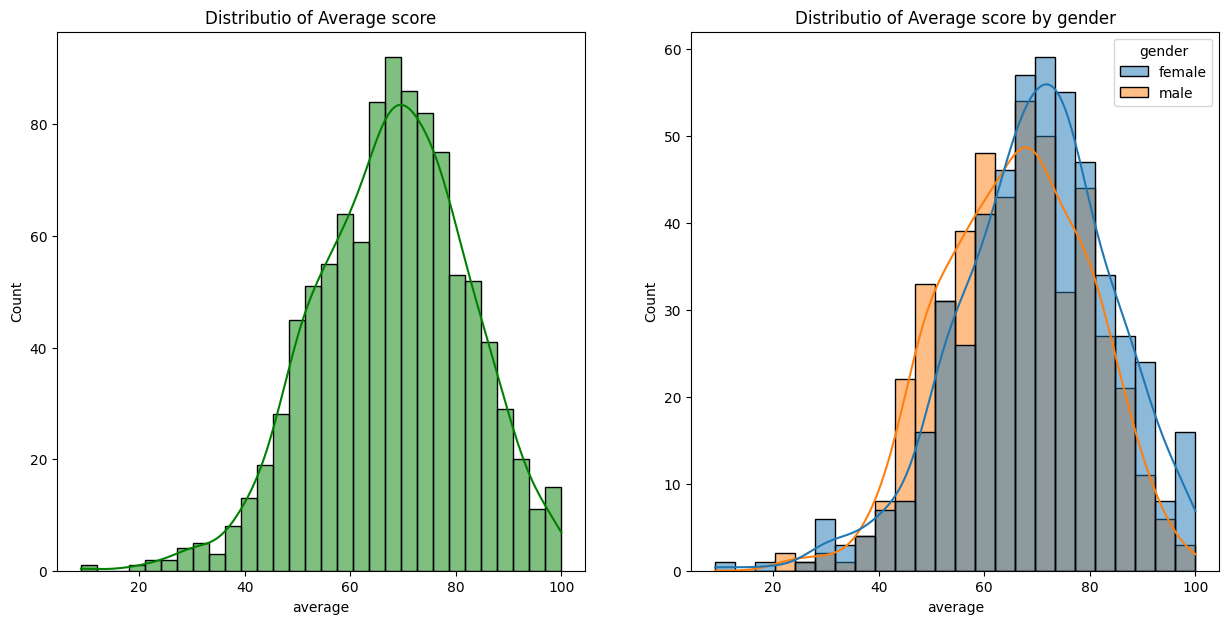

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) # (nrows, ncol, figsize)
plt.subplot(121) # 1 row, 2 column, 1st plot
sns.histplot(df['average'], bins=30, kde=True, color='g')
plt.title("Distributio of Average score")

plt.subplot(122) # 1 row, 2 column, 2nd plot
sns.histplot(data=df,x='average',kde=True,hue='gender')

plt.title("Distributio of Average score by gender")
plt.show()

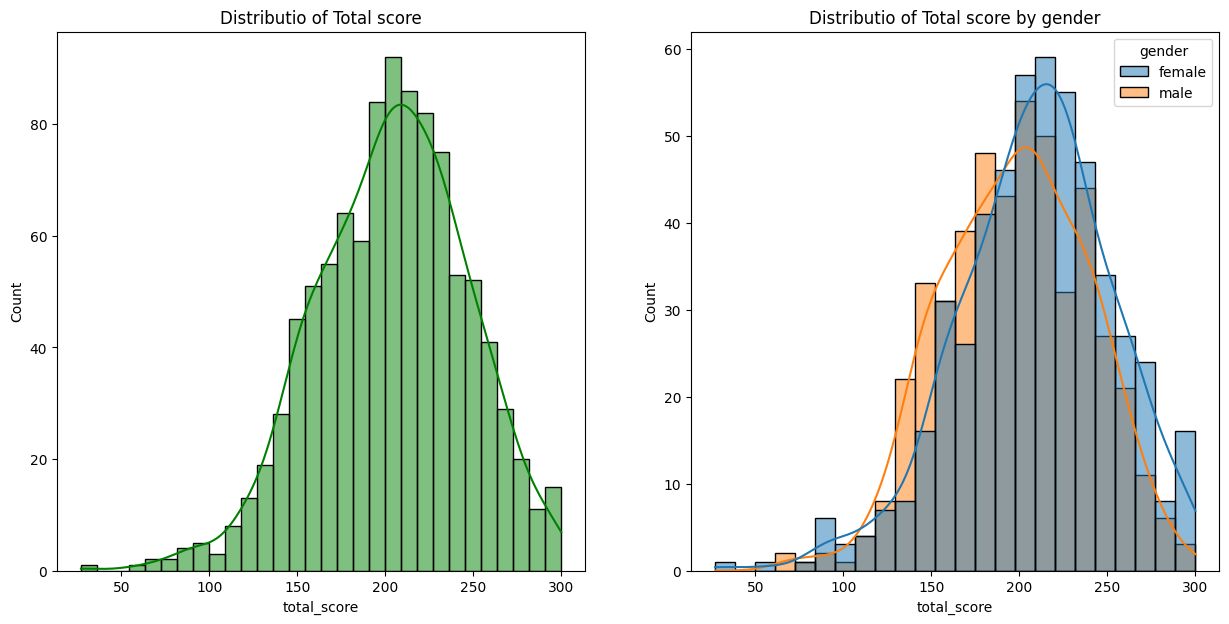

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) # (nrows, ncol, figsize)
plt.subplot(121) # 1 row, 2 column, 1st plot
sns.histplot(df['total_score'], bins=30, kde=True, color='g')
plt.title("Distributio of Total score")

plt.subplot(122) # 1 row, 2 column, 2nd plot
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

plt.title("Distributio of Total score by gender")
plt.show()

**Insight**

- Females tend to perform well than male students.

We're too good

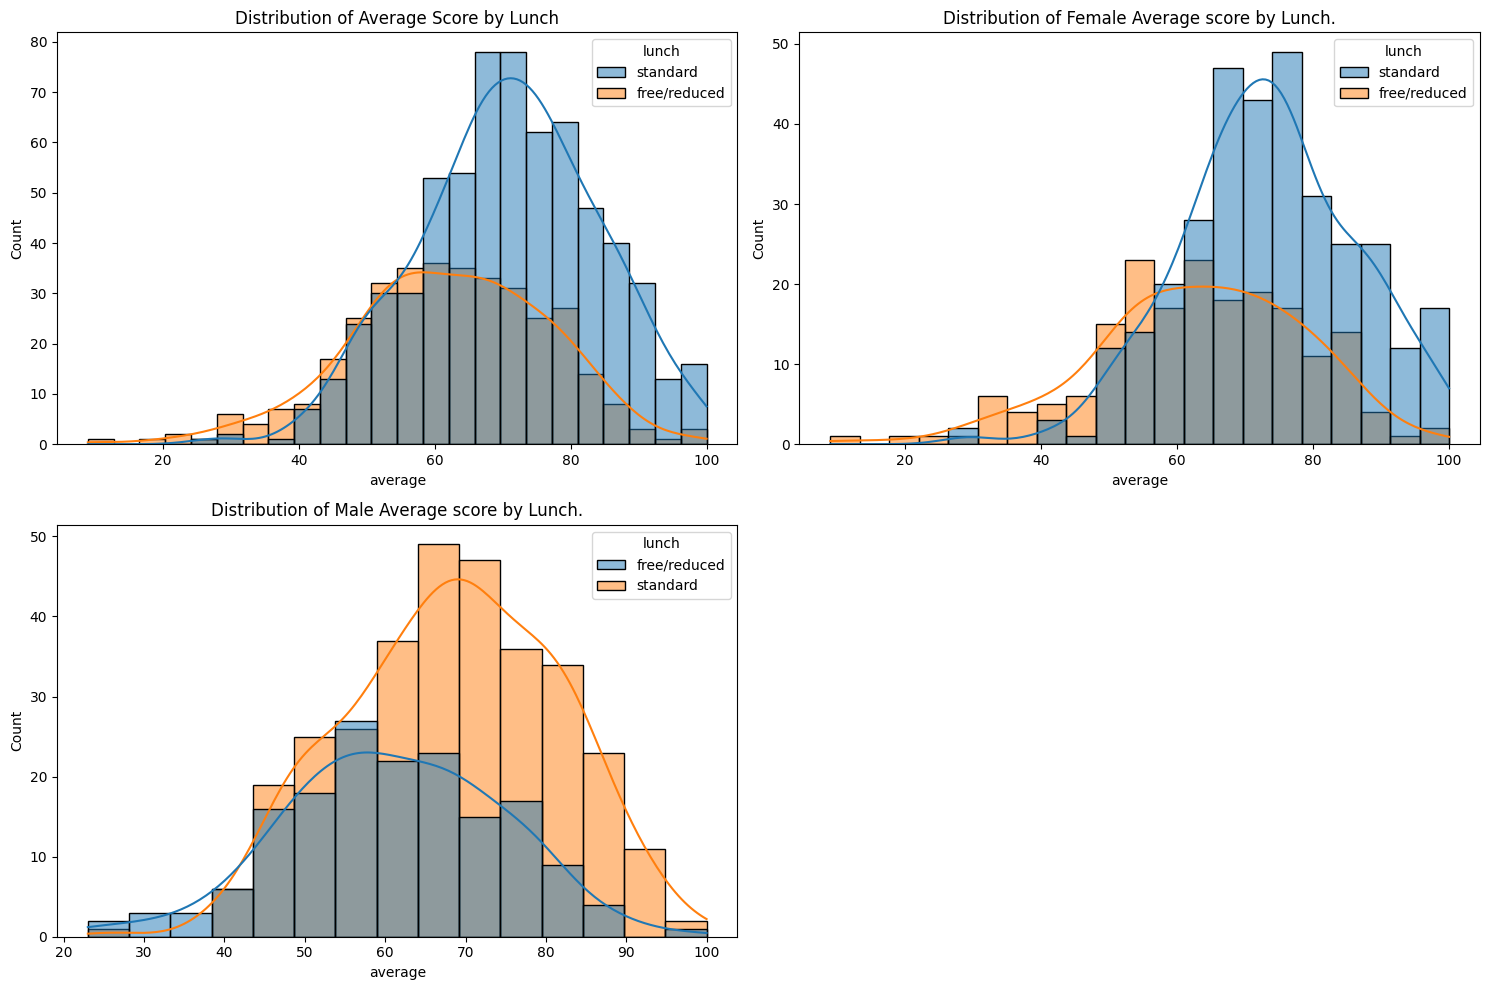

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

# First plot
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0,0])
axs[0, 0].set_title("Distribution of Average Score by Lunch")

# Second plot
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axs[0,1])
axs[0,1].set_title("Distribution of Female Average score by Lunch.")

# Third plot
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axs[1,0])
axs[1,0].set_title("Distribution of Male Average score by Lunch.")

# Hide the fourth subplot (bottom-right) since it's unused
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

**Insights**

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

Add plotly to the requirements

In [21]:
# # Create a 2x2 subplot grid
# fig = make_subplots(rows=2, cols=2, subplot_titles=[
#     "Distribution of Average Score by Lunch",
#     "Distribution of Female Average Score by Lunch",
#     "Distribution of Male Average Score by Lunch",
#     ""
# ])

# # First plot: Distribution of Average score by Lunch
# for lunch_type in df['lunch'].unique():
#     fig.add_trace(
#         go.Histogram(
#             x=df[df['lunch'] == lunch_type]['average'],
#             name=f"Lunch: {lunch_type}",
#             opacity=0.6
#         ),
#         row=1, col=1
#     )

# # Second plot: Distribution of Female Average score by Lunch
# for lunch_type in df['lunch'].unique():
#     fig.add_trace(
#         go.Histogram(
#             x=df[(df['gender'] == 'female') & (df['lunch'] == lunch_type)]['average'],
#             name=f"Lunch: {lunch_type} (Female)",
#             opacity=0.6
#         ),
#         row=1, col=2
#     )

# # Third plot: Distribution of Male Average score by Lunch
# for lunch_type in df['lunch'].unique():
#     fig.add_trace(
#         go.Histogram(
#             x=df[(df['gender'] == 'male') & (df['lunch'] == lunch_type)]['average'],
#             name=f"Lunch: {lunch_type} (Male)",
#             opacity=0.6
#         ),
#         row=2, col=1
#     )

# # Update layout
# fig.update_layout(
#     title_text="Score Distributions by Lunch and Gender",
#     barmode='overlay',  # Overlay the histograms
#     showlegend=True
# )

# # Adjust subplot layout
# fig.update_xaxes(title_text="Average Score", row=1, col=1)
# fig.update_xaxes(title_text="Average Score (Female)", row=1, col=2)
# fig.update_xaxes(title_text="Average Score (Male)", row=2, col=1)

# # Show the plot
# fig.show()

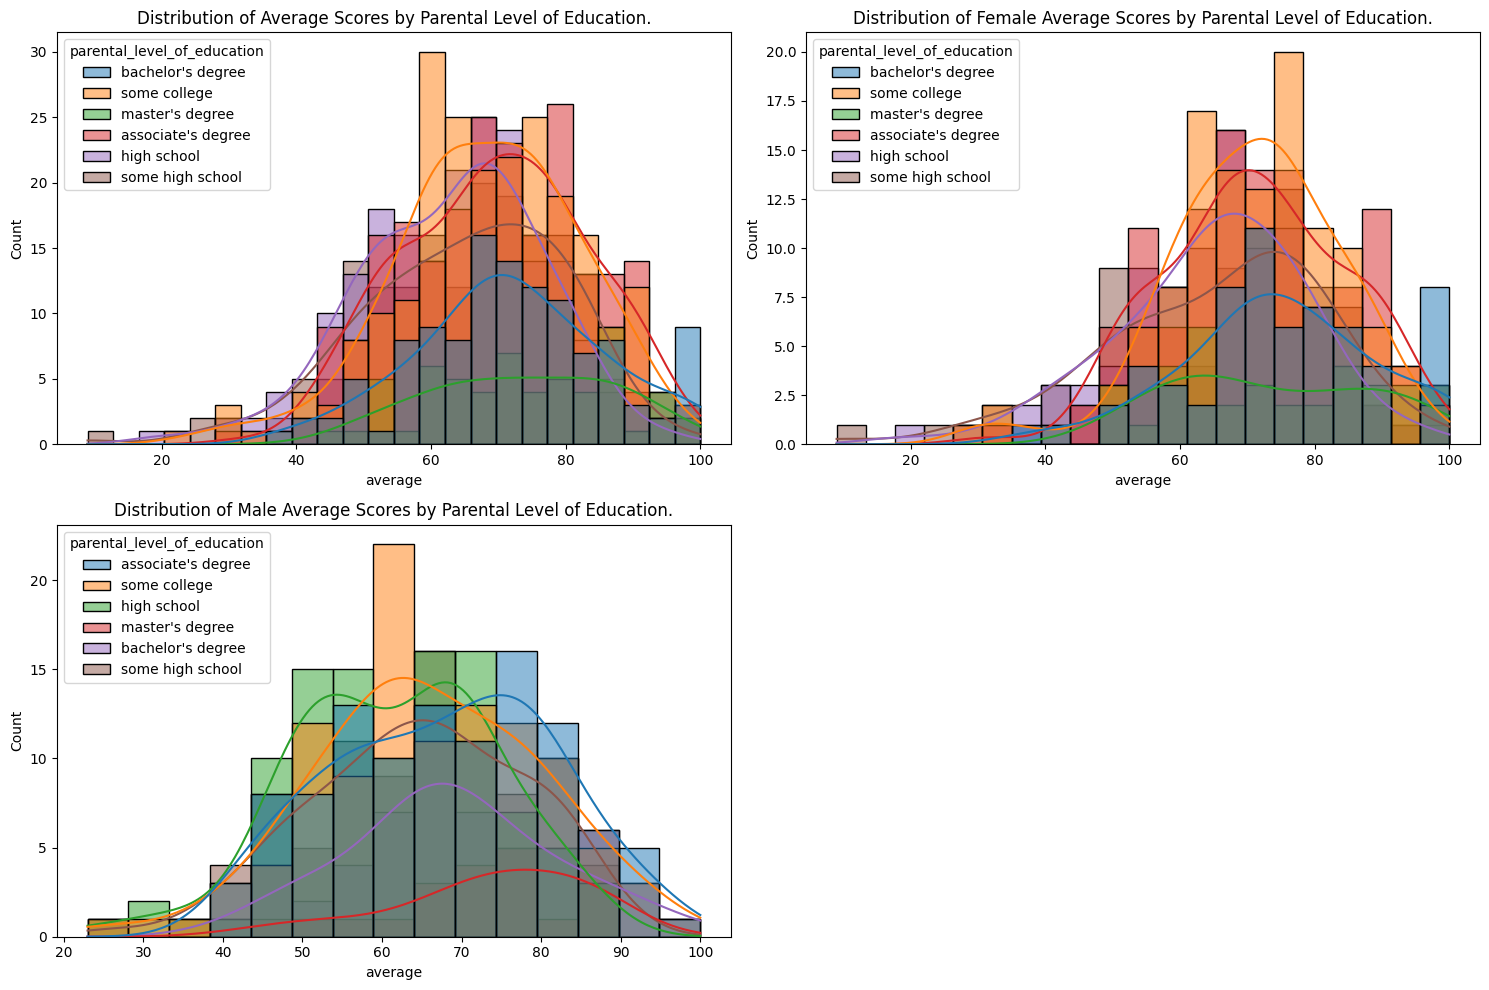

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0,0])
axs[0,0].set_title("Distribution of Average Scores by Parental Level of Education.")

# Plot 2
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[0,1])
axs[0,1].set_title("Distribution of Female Average Scores by Parental Level of Education.")

# Plot 3
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1,0])
axs[1,0].set_title("Distribution of Male Average Scores by Parental Level of Education.")

# Hide the fourth subplot (bottom-right) since it's unused
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

**Insights**

- In general parent's education don't help student perform well in exam.
- 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that ***parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam***

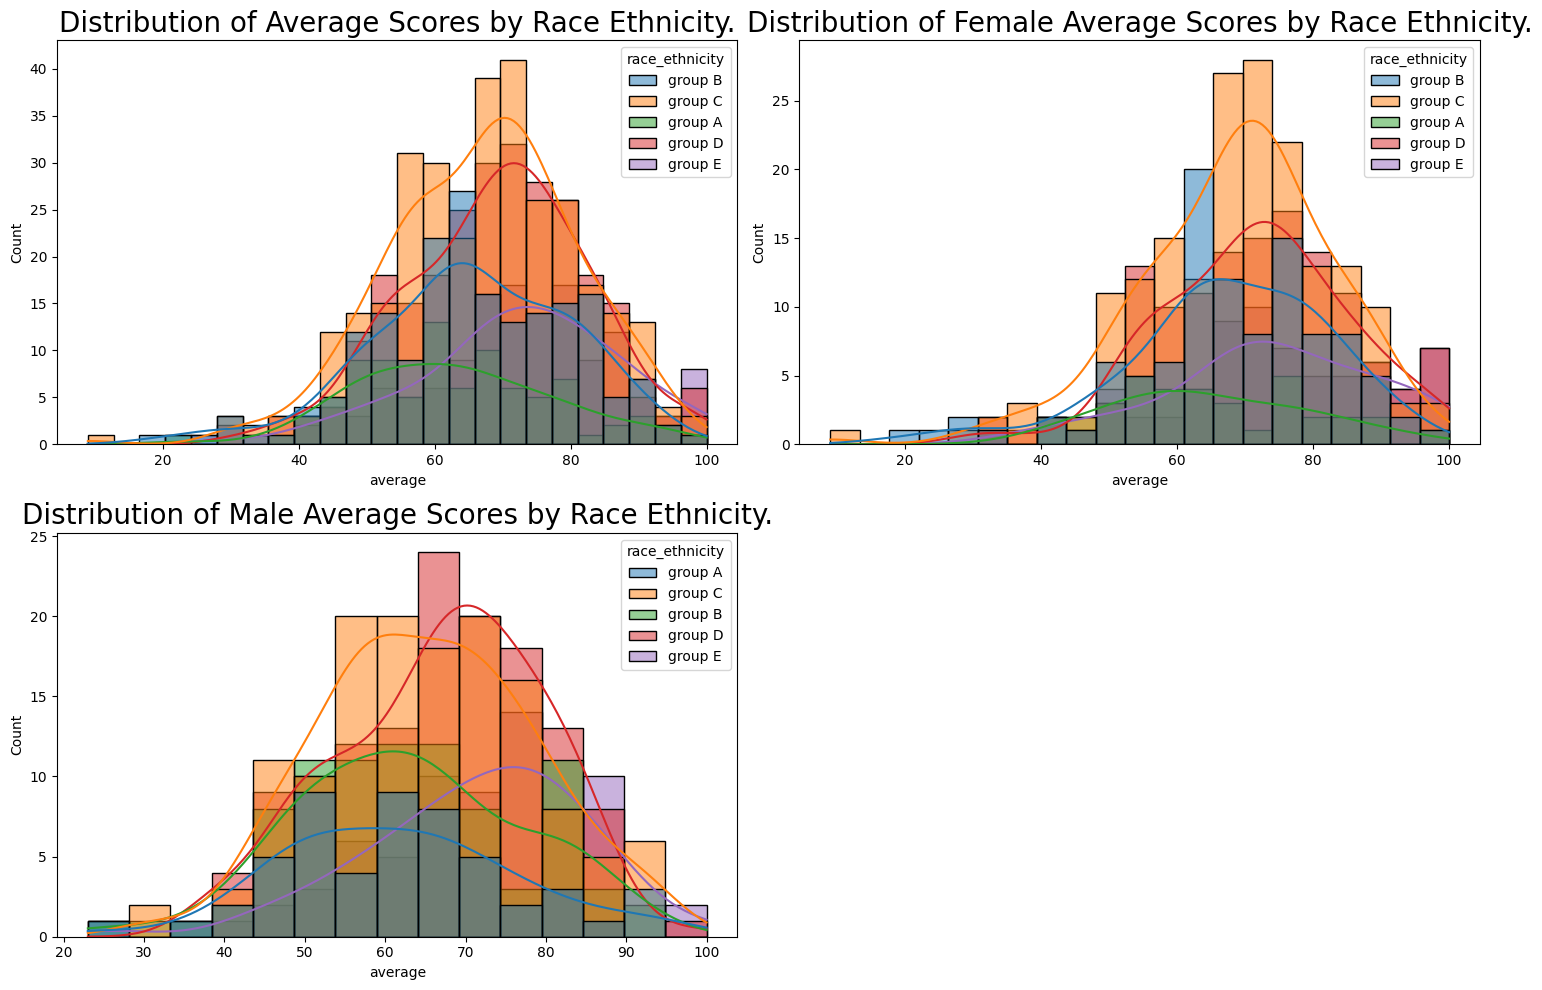

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0,0])
axs[0,0].set_title("Distribution of Average Scores by Race Ethnicity.", fontsize=20)

# Plot 2
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[0,1])
axs[0,1].set_title("Distribution of Female Average Scores by Race Ethnicity.", fontsize=20)

# Plot 1
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[1,0])
axs[1,0].set_title("Distribution of Male Average Scores by Race Ethnicity.", fontsize=20)

# Hide plot 4 since unused
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

**Insights**

- Students of "group A" and "group B" tends to perform poorly in exam.
- Students of "group A" and "group B" tends to perform poorly in exam irrespective of gender.
- 3rd plots shows that Male students of "group D" or "group E" tends to perform well in exam.

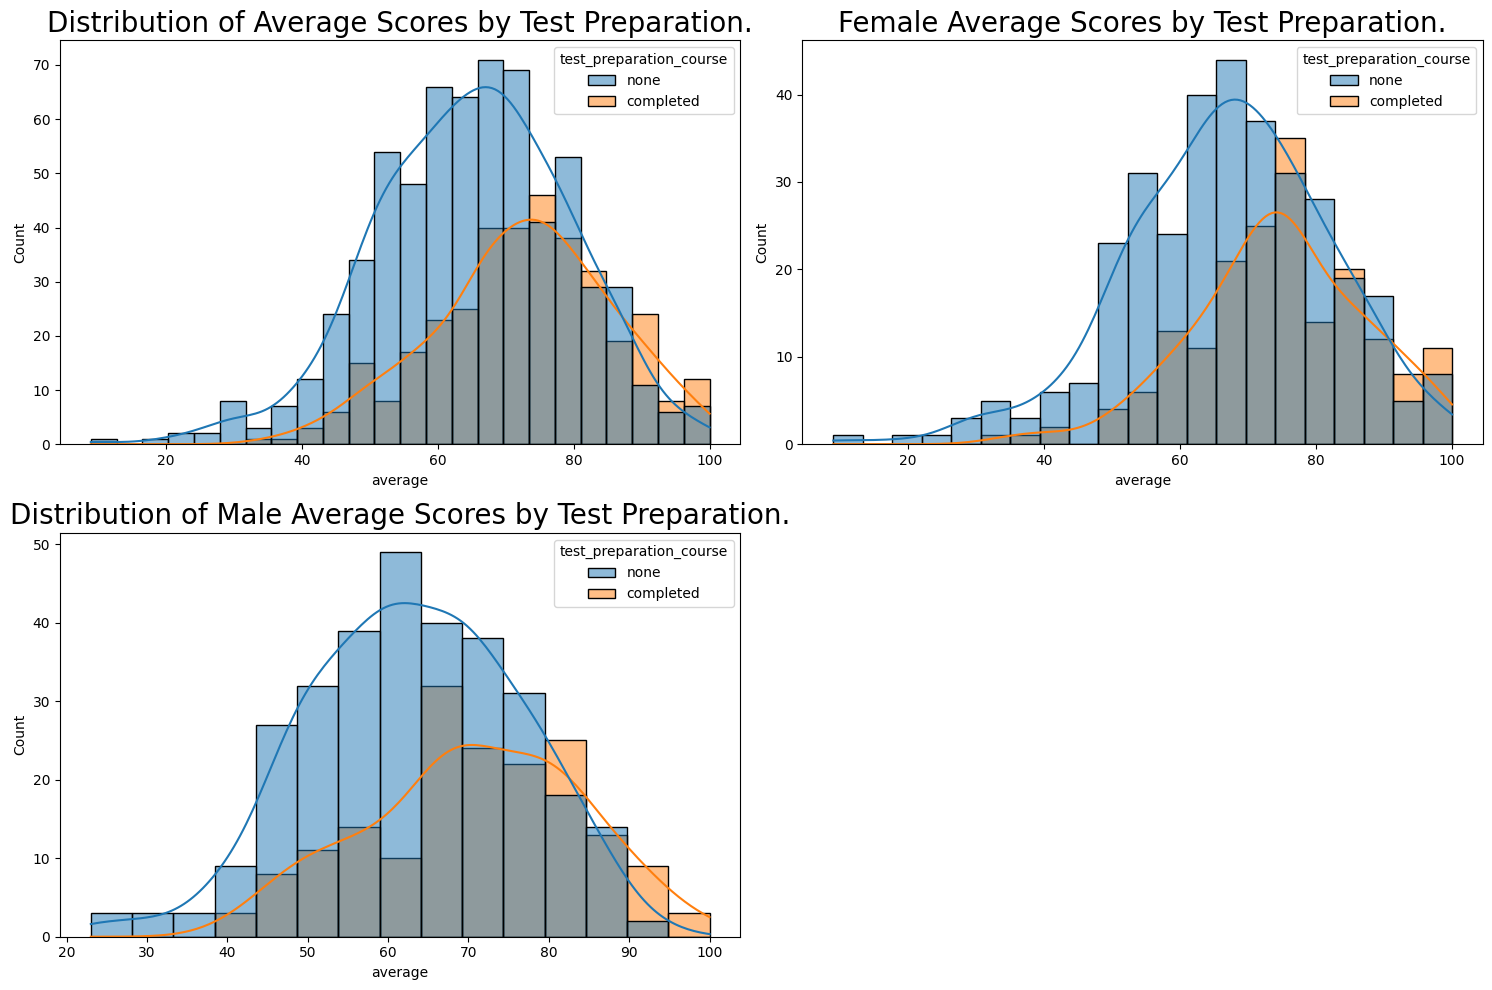

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
sns.histplot(df, x='average', kde=True, hue='test_preparation_course', ax=axs[0,0])
axs[0,0].set_title("Distribution of Average Scores by Test Preparation.", fontsize=20)

# Plot 2
sns.histplot(df[df['gender'] == 'female'], x='average', kde=True, hue='test_preparation_course', ax=axs[0,1])
axs[0,1].set_title("Female Average Scores by Test Preparation.", fontsize=20)

# Plot 3
sns.histplot(df[df['gender'] == 'male'], x='average', kde=True, hue='test_preparation_course', ax=axs[1,0])
axs[1,0].set_title("Distribution of Male Average Scores by Test Preparation.", fontsize=20)

# Hide 4th plot not in use
axs[1,1].axis('off')

plt.tight_layout()
plt.show()


**Insight**

- In all plots Students who complted their Test Preparation Course tends to perform better in exam.

#### 4.2 Maximumum score of students in all three subjects

In [28]:
# Create subplots: 1 row, 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    "Math Scores", "Reading Scores", "Writing Scores"
])

# Violin Plot 1:
fig.add_trace(
    go.Violin(y=df['math_score'], box_visible=True, points=False, line_color='red'),
    row=1, col=1
)

# Violin Plot 2:
fig.add_trace(
    go.Violin(y=df['reading_score'], box_visible=True, points=False, line_color='green'),
    row=1, col=2
)

# Violin Plot 3:
fig.add_trace(
    go.Violin(y=df['writing_score'], box_visible=True, points=False, line_color='blue'),
    row=1, col=3
)

# Update layout
fig.update_layout(title_text="Violin Plots for Student Scores", showlegend=False)

# Show the plot
fig.show()

**Insights**

- Most students scored between 57 and 77 in Maths
- Most students scored between 59 and 79 in Reading
- Most students scored between 57 and 79 in Writing



#### 4.3 Multivariate analysis using pieplot


In [32]:
# Create subplots: 2 row, 3 columns
fig = make_subplots(rows=2, cols=3, 
                    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],   # First row
                            [{'type': 'pie'}, {'type': 'pie'}, None]],   # Second row (None means empty space)    
                    subplot_titles=["Gender", "Race/Ethnicity", "Lunch", "Test Course", "Parental Education"]
)

# Pie plot 1: Gender Distribution
gender_count = df['gender'].value_counts()
fig.add_trace(
    go.Pie(labels=gender_count.index, values=gender_count.values, name="Gender Distribution", marker=dict(colors=['blue', 'pink']), hole=0.3),
    row=1, col=1
)

# Pie plot 2: Race/ethnicity Distribution
race_count = df['race_ethnicity'].value_counts()
fig.add_trace(go.Pie(
    labels=race_count.index, values=race_count.values, name="Race/Ethnicity Distribution", marker=dict(colors=px.colors.qualitative.Pastel), hole=0.3
), row=1, col=2)

# Pie plot 3: Lunch Distribution
lunch_count = df['lunch'].value_counts()
fig.add_trace(go.Pie(
    labels=lunch_count.index, values=lunch_count.values, name="Lunch Distribution", marker=dict(colors=['#ff9999', '#66b3ff']), hole=0.3
), row=1, col=3)

# Pie plot 4: Test Preparation Distribution
test_prep_count = df['test_preparation_course'].value_counts()
fig.add_trace(go.Pie(
    labels=test_prep_count.index, values=test_prep_count.values, name="Test Preparation Distribution", marker=dict(colors=['red', 'green']), hole=0.3
), row=2, col=1)

# Pie plot 5: Race/ethnicity Distribution
parental_level_count = df['parental_level_of_education'].value_counts()
fig.add_trace(go.Pie(
    labels=parental_level_count.index, values=parental_level_count.values, name="Parental Educ Distribution", marker=dict(colors=px.colors.qualitative.Pastel), hole=0.3
), row=2, col=2)

# Update layout
fig.update_layout(
    title_text="Multivariate Analysis Using Pie Charts",
    showlegend=False,   # Hide legends if not needed
)

fig.show()

**Insights**

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

- How is distribution of Gender ?
- Does gender have any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

**Insight**

From the pie graph above. Gender has balance dataset with female students 518 (52%) and male students 482 (48%)

#### BIVARIATE ANALYSIS ( Does gender have any impact on student's performance ? )

In [36]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [42]:
X = ['Total Average', 'Math Average']
female_math_scores = [gender_group['average']['female'], gender_group['math_score']['female']]
male_math_scores = [gender_group['average']['male'], gender_group['math_score']['male']]

# Create Bar graph
fig = go.Figure()

# Bar graph for Male scores
fig.add_trace(go.Bar(
    x=X, y=male_math_scores, offsetgroup=0, marker=dict(color='blue'), name="Male Scores"
))

# Bar graph for Female scores
fig.add_trace(go.Bar(
    x=X, y=female_math_scores, offsetgroup=1, marker=dict(color='pink'), name="Female Scores"
))

fig.update_layout(
    title="Total Average vs Math Average Marks by Gender",
    yaxis_title="Marks",
    barmode='group',   # Groups bars for each category
    title_font=dict(size=20, color='#008080', family="Arial"),
    legend_title="Gender"
)

fig.show()

**Insights**

- On Average Female has better score than Male.
- Whereas Male scored higher in Maths Exam

#### 4.4.2 RACE/EHNICITY COLUMN

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**
From the pie graph of 4.3:
- Most of the student belonging from group C /group D.
- Lowest number of students belong to group A.

**BIVARIATE ANALYSIS (Is Race/Ehnicity has any impact on student's performance ?)**

In [47]:
mean_math_score = df.groupby('race_ethnicity')['math_score'].mean()
mean_reading_score = df.groupby('race_ethnicity')['reading_score'].mean()
mean_writing_score = df.groupby('race_ethnicity')['writing_score'].mean()

#  Create subplots: 1 row, 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=("Math Score", "Reading Score", "Writing Score"))

# Bar Plot for Math Score
fig.add_trace(go.Bar(
    x=mean_math_score.index, y=mean_math_score.values, name="Math Score", marker=dict(color='rgba(0, 92, 230, 0.7)')
), row=1, col=1)

# Bar Plot for Reading Score
fig.add_trace(go.Bar(
    x=mean_reading_score.index, y=mean_reading_score.values, name="Reading Score", marker=dict(color='rgba(255, 102, 102, 0.7)')
), row=1, col=2)

# Bar Plot for Writing Score
fig.add_trace(go.Bar(
    x=mean_writing_score.index, y=mean_writing_score.values, name="Writing Score", marker=dict(color='rgba(60, 179, 113, 0.7)')
), row=1, col=3)

fig.update_layout(
    title="Average Scores by Subject",
    yaxis_title="Average Score",
    xais_title="Race Ethnicity"
    barmode='group',   # Group bars together
    title_font=dict(size=20, color='#005ce6'),
    legend_title="Scores",
    showlegend=False
)

fig.show()

**Insight**

- Group E scored the highest mark in all Subjects.
- Group A scored the lowest mark across all Subjects.
- ?

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**
From the pie plot in 4.3
- Larger number of parents (22.6%) are from "some college"

**BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

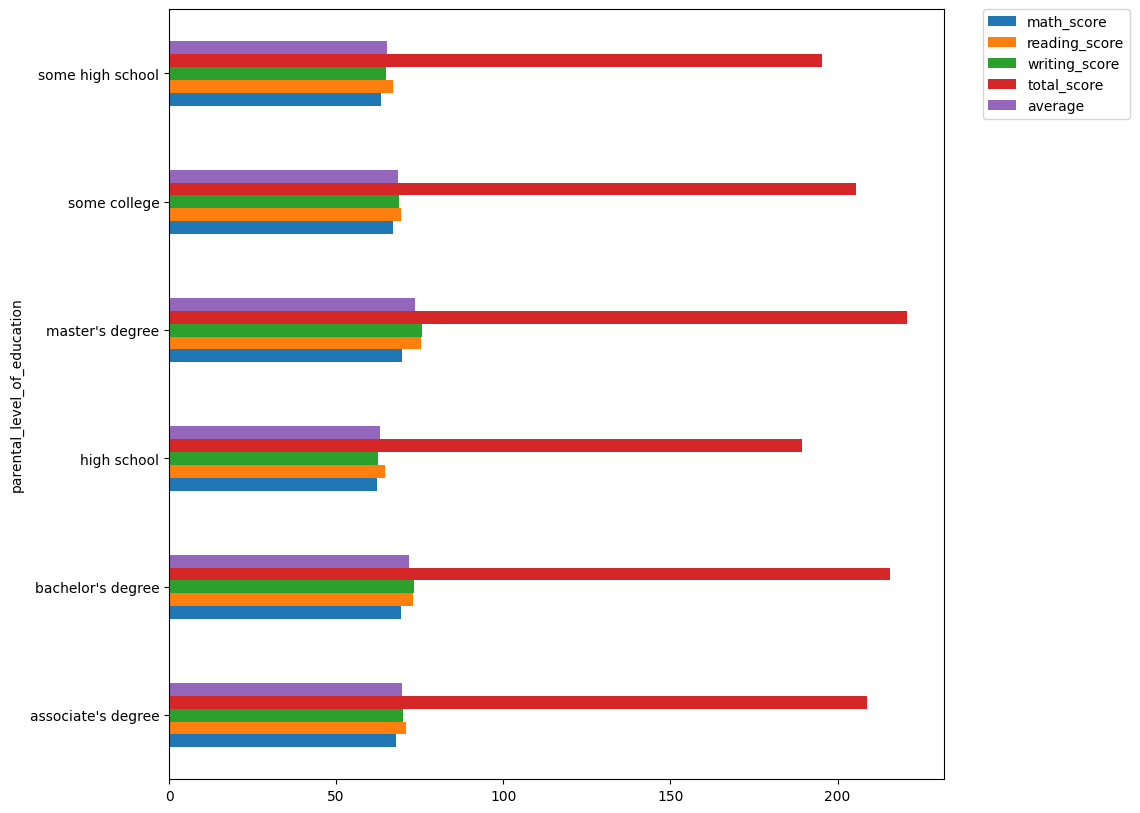

In [49]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

For me not really a good predictor. No clear difference

#### 4.4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

**UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**
- Students being served Standard Lunch are more with 65% than free lunch

**BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )**

In [54]:
lunch_count

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [55]:
# Calculate mean scores by lunch type
mean_score = df.groupby('lunch').mean(numeric_only=True)
mean_score

,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


In [56]:
# Create a bar plot for each subject
fig = go.Figure()

# Bar Plot for Math Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['math_score'], name="Math Average", marker=dict(color='rgba(0, 92, 230, 0.7)')
))

# Bar Plot for reading Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['reading_score'], name="Reading Average", marker=dict(color='rgba(255, 102, 102, 0.7)')
))

# Bar Plot for Writing Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['writing_score'], name="Writing Average", marker=dict(color='rgba(60, 179, 113, 0.7)')
))

fig.update_layout(
    title="Impact of Lunch Type on Student Performance",
    xaxis_title="Lunch Type",
    yaxis_title="Average Score",
    barmode='group',  # Group bars together
    title_font=dict(size=20, color='#005ce6'),
    legend_title="Subjects",
    showlegend=True  # Show legend to distinguish subjects
)

fig.show()

**Insight**

- Students who get Standard Lunch tends to perform better in all three subjects than students who get Free/Reduced Lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

- Which type of test preparation is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

**UNIVARIATE ANALYSIS (Which type of test preparation is most common amoung students ?)**
- NONE

**BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )**

In [58]:
mean_score = df.groupby('test_preparation_course').mean(numeric_only=True)
mean_score

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


In [59]:
# Create a bar plot for each subject
fig = go.Figure()

# Bar Plot for Math Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['math_score'], name="Math Average", marker=dict(color='rgba(0, 92, 230, 0.7)')
))

# Bar Plot for Reading Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['reading_score'], name="Reading Average", marker=dict(color='rgba(255, 102, 102, 0.7)')
))

# Bar Plot for Writing Average
fig.add_trace(go.Bar(
    x=mean_score.index, y=mean_score['writing_score'], name="Writing Average", marker=dict(color='rgba(60, 179, 113, 0.7)')
))

fig.update_layout(
    title="Impact of Test Preparation Course on Student Performance",
    xaxis_title="Test Preparation Course",
    yaxis_title="Average Score",
    barmode='group',  # Group bars together
    title_font=dict(size=20, color='#005ce6'),
    legend_title="Subjects",
    showlegend=True  # Show legend to distinguish subjects
)

fig.show()

**Insights**

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [60]:
# Create subplots: 1 row, 4 columns
fig = make_subplots(rows=1, cols=4, subplot_titles=("Math Score", "Reading Score", "Writing Score", "Average"))

# Box plot for Math Score
fig.add_trace(go.Box(y=df['math_score'], name="Math Score", marker_color='skyblue'), row=1, col=1)

# Box plot for Reading Score
fig.add_trace(go.Box(y=df['reading_score'], name="Reading Score", marker_color='hotpink'), row=1, col=2)

# Box plot for Writing Score
fig.add_trace(go.Box(y=df['writing_score'], name="Writing Score", marker_color='yellow'), row=1, col=3)

# Box plot for Average Score
fig.add_trace(go.Box(y=df['average'], name="Average", marker_color='lightgreen'), row=1, col=4)

# Update layout
fig.update_layout(
    title="Box Plots of Scores",
    height=400,  # Set height for better visibility
    showlegend=False  # No legend needed for box plots
)

# Show plot
fig.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

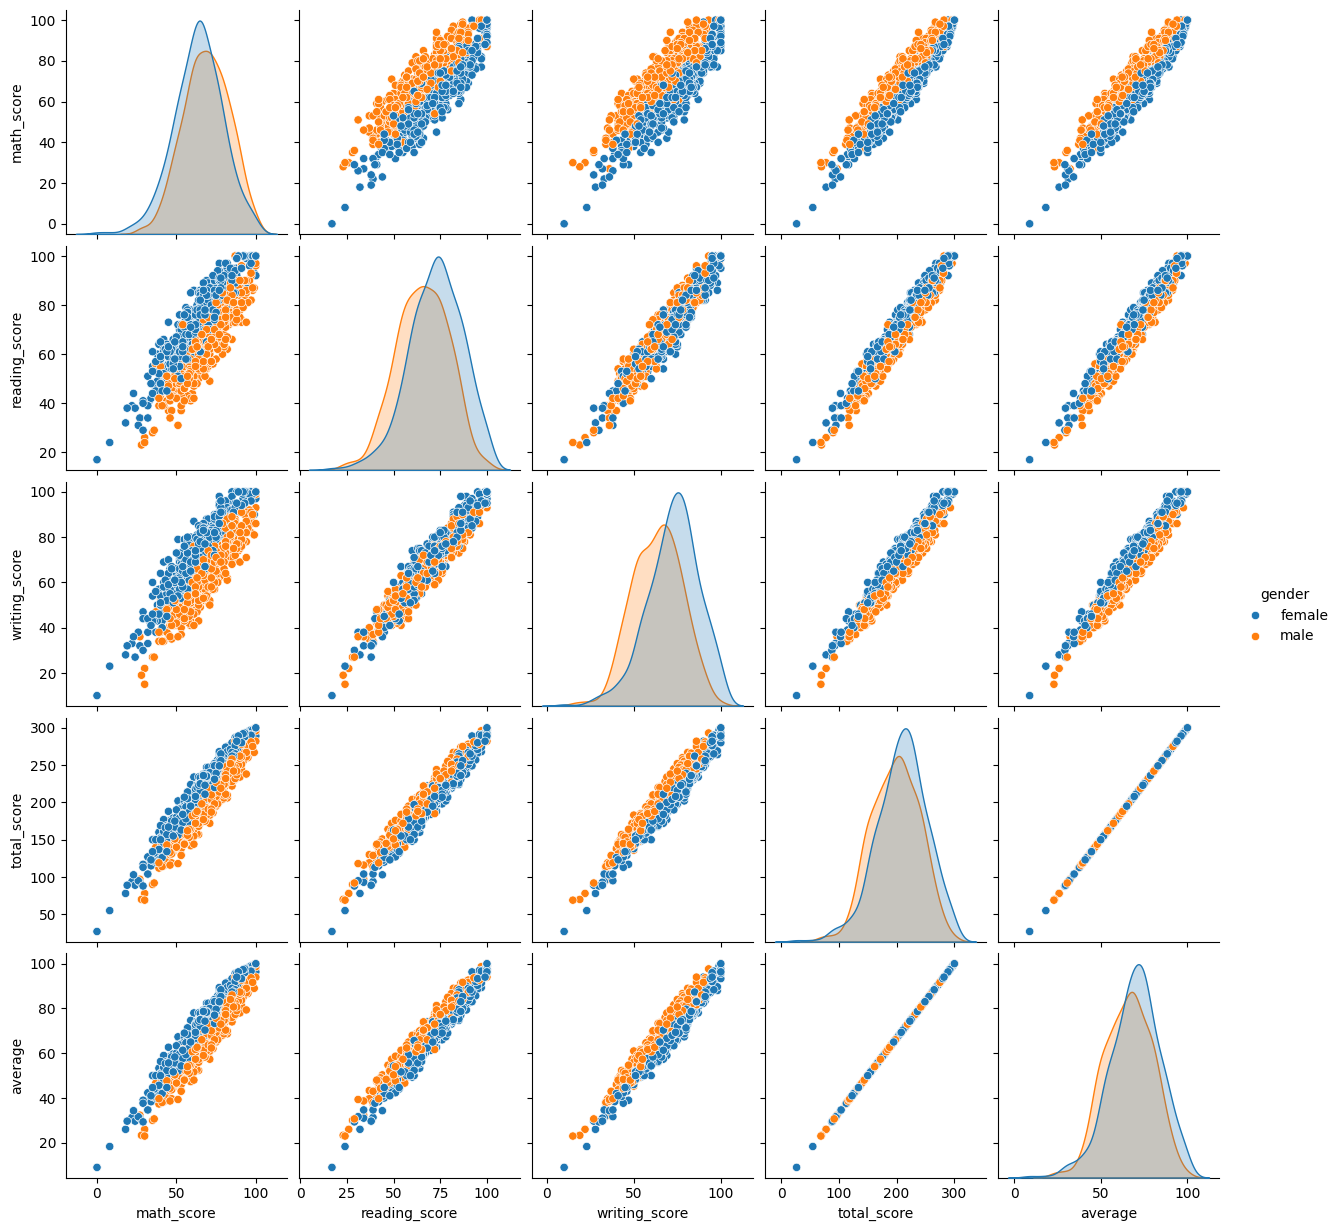

In [61]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**

- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions

- - Student's Performance is related with lunch, race, parental level education
- - Females lead in pass percentage and also are top-scorers
- - Student's Performance is not much related with PARENTAL LEVEL OF EDUCATION
- - Finishing preparation course is benefitial.

In [26]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')